In [30]:
import pandas as pd
from sklearn.decomposition import PCA
from sklearn.ensemble import RandomForestRegressor
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split

import matplotlib.pyplot as plt
import seaborn as sns



from sklearn.metrics import r2_score, mean_squared_error

In [15]:
datos = pd.read_csv("mxmh_survey_results.csv")
datos.columns

Index(['Timestamp', 'Age', 'Primary streaming service', 'Hours per day',
       'While working', 'Instrumentalist', 'Composer', 'Fav genre',
       'Exploratory', 'Foreign languages', 'BPM', 'Frequency [Classical]',
       'Frequency [Country]', 'Frequency [EDM]', 'Frequency [Folk]',
       'Frequency [Gospel]', 'Frequency [Hip hop]', 'Frequency [Jazz]',
       'Frequency [K pop]', 'Frequency [Latin]', 'Frequency [Lofi]',
       'Frequency [Metal]', 'Frequency [Pop]', 'Frequency [R&B]',
       'Frequency [Rap]', 'Frequency [Rock]', 'Frequency [Video game music]',
       'Anxiety', 'Depression', 'Insomnia', 'OCD', 'Music effects',
       'Permissions'],
      dtype='object')

In [16]:
datos.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 736 entries, 0 to 735
Data columns (total 33 columns):
 #   Column                        Non-Null Count  Dtype  
---  ------                        --------------  -----  
 0   Timestamp                     736 non-null    object 
 1   Age                           735 non-null    float64
 2   Primary streaming service     735 non-null    object 
 3   Hours per day                 736 non-null    float64
 4   While working                 733 non-null    object 
 5   Instrumentalist               732 non-null    object 
 6   Composer                      735 non-null    object 
 7   Fav genre                     736 non-null    object 
 8   Exploratory                   736 non-null    object 
 9   Foreign languages             732 non-null    object 
 10  BPM                           629 non-null    float64
 11  Frequency [Classical]         736 non-null    object 
 12  Frequency [Country]           736 non-null    object 
 13  Frequ

Hours per day, se queda en los datos sin mayor cambio

Se cambio While working de Yes o No a lago binario, 1 y 0

In [17]:
datos['While working'] = datos['While working'].map({'Yes': 1, 'No': 0})

Eliminar NAH de age

In [18]:
datos = datos.dropna(subset=['Age'])


'Never' 'Nunca' = 0
'Rarely' 'Rara vez' = 1
'Sometimes' 'A veces' = 2
'Very frequently' 'Muy frecuentemente' = 3


'Rara vez' 'Nunca' 'Muy frecuentemente' 'A veces'

In [19]:
datos["Frequency [Classical]"].unique()
columnas_frecuencias = [
    "Frequency [Classical]", "Frequency [Country]", "Frequency [EDM]", "Frequency [Folk]",
    "Frequency [Gospel]", "Frequency [Hip hop]", "Frequency [Jazz]", "Frequency [K pop]",
    "Frequency [Latin]", "Frequency [Lofi]", "Frequency [Metal]", "Frequency [Pop]",
    "Frequency [R&B]", "Frequency [Rap]", "Frequency [Rock]", "Frequency [Video game music]"
]

for columna in columnas_frecuencias :
    print(f"{columna}: {datos[columna].unique()}")

Frequency [Classical]: ['Rarely' 'Sometimes' 'Never' 'Very frequently']
Frequency [Country]: ['Never' 'Sometimes' 'Very frequently' 'Rarely']
Frequency [EDM]: ['Rarely' 'Never' 'Very frequently' 'Sometimes']
Frequency [Folk]: ['Never' 'Rarely' 'Sometimes' 'Very frequently']
Frequency [Gospel]: ['Never' 'Sometimes' 'Rarely' 'Very frequently']
Frequency [Hip hop]: ['Sometimes' 'Rarely' 'Never' 'Very frequently']
Frequency [Jazz]: ['Never' 'Very frequently' 'Rarely' 'Sometimes']
Frequency [K pop]: ['Very frequently' 'Rarely' 'Sometimes' 'Never']
Frequency [Latin]: ['Very frequently' 'Sometimes' 'Never' 'Rarely']
Frequency [Lofi]: ['Rarely' 'Sometimes' 'Very frequently' 'Never']
Frequency [Metal]: ['Never' 'Sometimes' 'Rarely' 'Very frequently']
Frequency [Pop]: ['Very frequently' 'Sometimes' 'Rarely' 'Never']
Frequency [R&B]: ['Sometimes' 'Never' 'Very frequently' 'Rarely']
Frequency [Rap]: ['Very frequently' 'Rarely' 'Never' 'Sometimes']
Frequency [Rock]: ['Never' 'Very frequently' 'Rare

In [20]:

mapeo_frecuencia = {
    'Never': 0,
    'Rarely': 1,
    'Sometimes': 2,
    'Very frequently': 3
}


for columna in columnas_frecuencias:
    datos[columna] = datos[columna].map(mapeo_frecuencia)

In [21]:
for columna in columnas_frecuencias:
    print(f"{columna}: {datos[columna].unique()}")

Frequency [Classical]: [1 2 0 3]
Frequency [Country]: [0 2 3 1]
Frequency [EDM]: [1 0 3 2]
Frequency [Folk]: [0 1 2 3]
Frequency [Gospel]: [0 2 1 3]
Frequency [Hip hop]: [2 1 0 3]
Frequency [Jazz]: [0 3 1 2]
Frequency [K pop]: [3 1 2 0]
Frequency [Latin]: [3 2 0 1]
Frequency [Lofi]: [1 2 3 0]
Frequency [Metal]: [0 2 1 3]
Frequency [Pop]: [3 2 1 0]
Frequency [R&B]: [2 0 3 1]
Frequency [Rap]: [3 1 0 2]
Frequency [Rock]: [0 3 1 2]
Frequency [Video game music]: [2 1 3 0]


In [22]:
datos.info()

<class 'pandas.core.frame.DataFrame'>
Index: 735 entries, 0 to 735
Data columns (total 33 columns):
 #   Column                        Non-Null Count  Dtype  
---  ------                        --------------  -----  
 0   Timestamp                     735 non-null    object 
 1   Age                           735 non-null    float64
 2   Primary streaming service     734 non-null    object 
 3   Hours per day                 735 non-null    float64
 4   While working                 732 non-null    float64
 5   Instrumentalist               731 non-null    object 
 6   Composer                      734 non-null    object 
 7   Fav genre                     735 non-null    object 
 8   Exploratory                   735 non-null    object 
 9   Foreign languages             731 non-null    object 
 10  BPM                           629 non-null    float64
 11  Frequency [Classical]         735 non-null    int64  
 12  Frequency [Country]           735 non-null    int64  
 13  Frequency 

In [23]:
columnas_a_eliminar = [ 'Timestamp','Primary streaming service',
       'While working', 'Instrumentalist', 'Composer', 'Fav genre',
       'Exploratory', 'Foreign languages', 'BPM', 'Music effects',
       'Permissions']


datos_musica = datos.drop(columns=columnas_a_eliminar)

datos_musica.info()

<class 'pandas.core.frame.DataFrame'>
Index: 735 entries, 0 to 735
Data columns (total 22 columns):
 #   Column                        Non-Null Count  Dtype  
---  ------                        --------------  -----  
 0   Age                           735 non-null    float64
 1   Hours per day                 735 non-null    float64
 2   Frequency [Classical]         735 non-null    int64  
 3   Frequency [Country]           735 non-null    int64  
 4   Frequency [EDM]               735 non-null    int64  
 5   Frequency [Folk]              735 non-null    int64  
 6   Frequency [Gospel]            735 non-null    int64  
 7   Frequency [Hip hop]           735 non-null    int64  
 8   Frequency [Jazz]              735 non-null    int64  
 9   Frequency [K pop]             735 non-null    int64  
 10  Frequency [Latin]             735 non-null    int64  
 11  Frequency [Lofi]              735 non-null    int64  
 12  Frequency [Metal]             735 non-null    int64  
 13  Frequency 

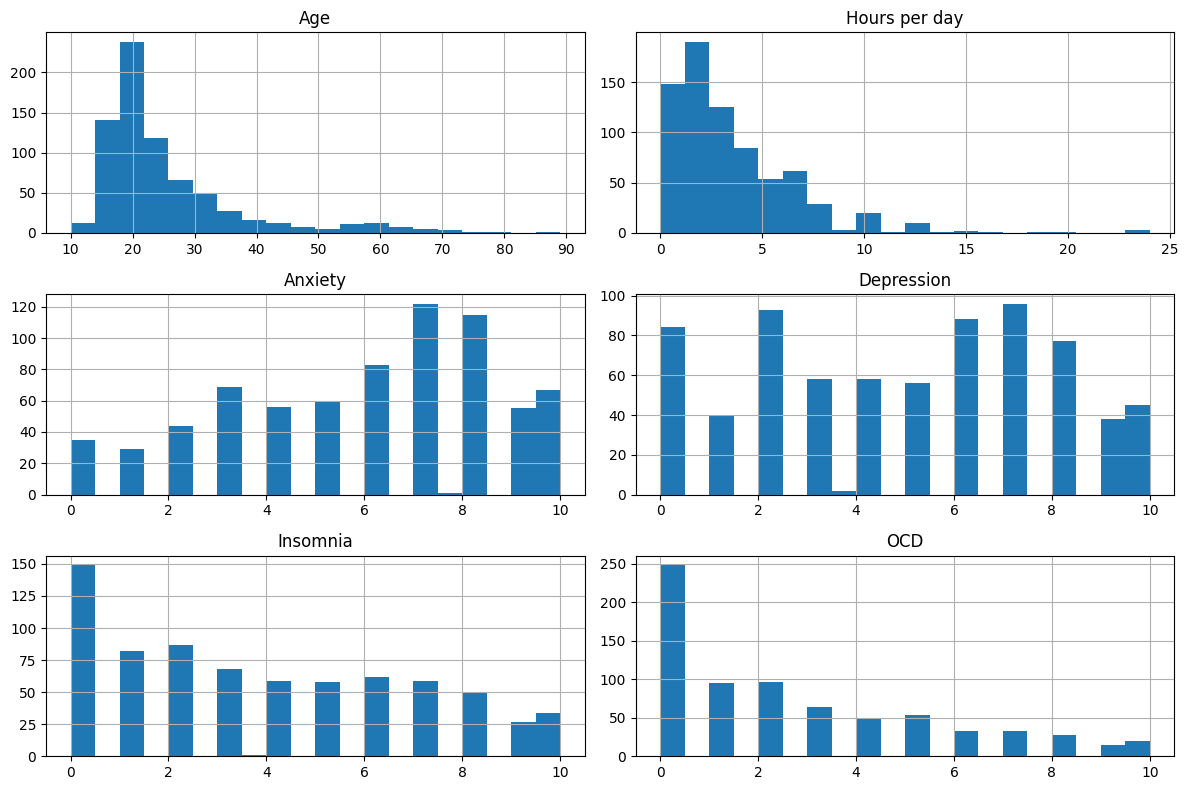

In [32]:
numericas = ['Age', 'Hours per day', 'Anxiety', 'Depression', 'Insomnia', 'OCD']
datos[numericas].hist(bins=20, figsize=(12, 8))
plt.tight_layout()
plt.show()

Como se puede ver en el histograma los encuestados tienen a ser gente joven.

En cuanto a las variables a predecir, ansiedad, insomnio y depresión tienden a estar balanceadas, pero OCD se aproxima más al 0. Esto se debe a que el trastorno obsesivo-compulsivo es menos común de padecer
Las horas al dìa que escuchan musica es normal


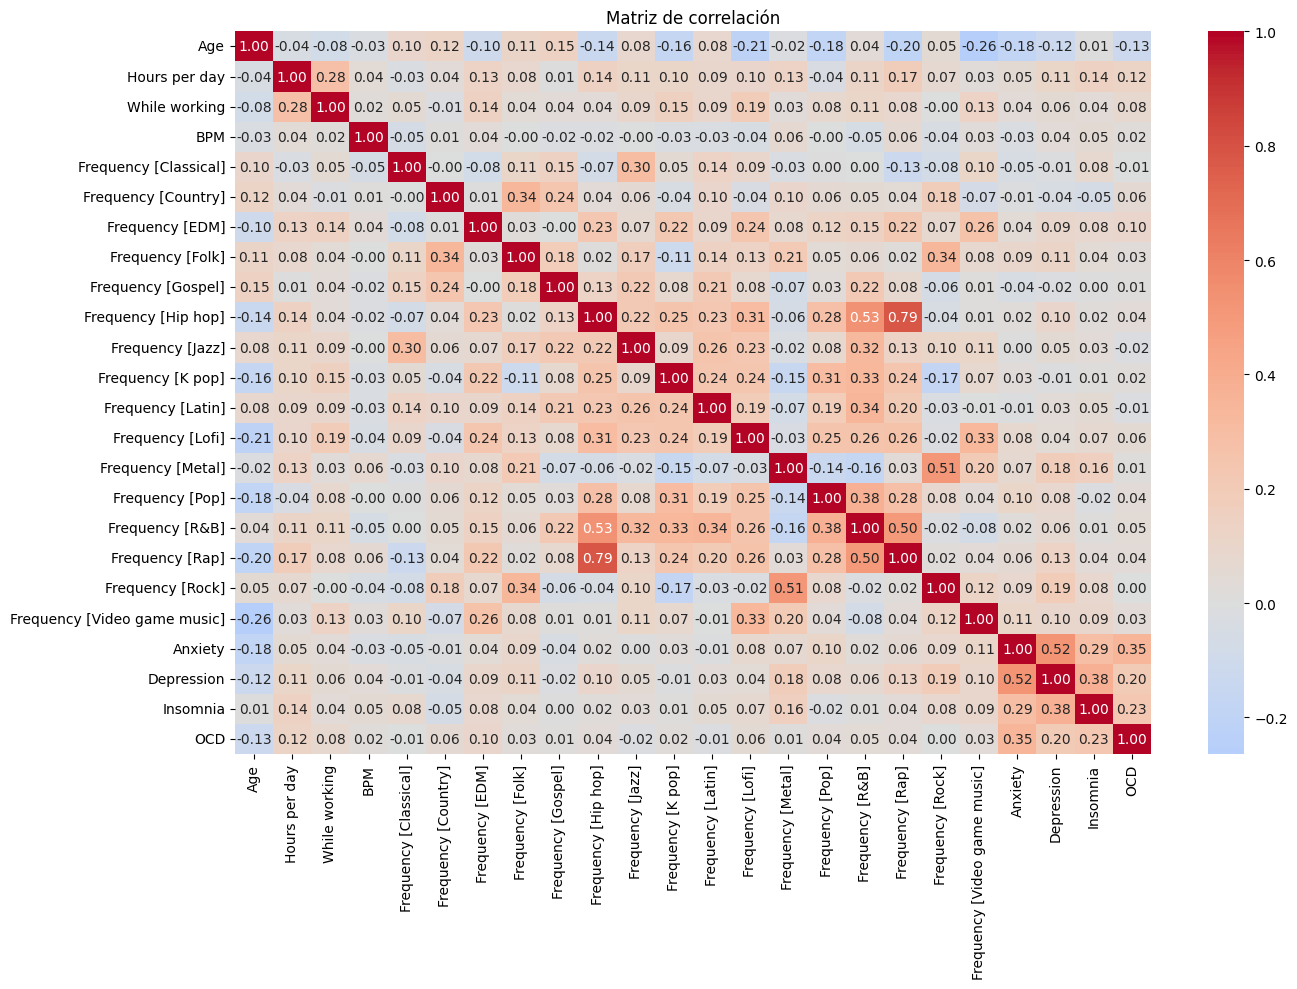

In [33]:


datos_numericas = datos.select_dtypes(include='number')
correlacion = datos_numericas.corr()


plt.figure(figsize=(14, 10))
sns.heatmap(correlacion, annot=True, fmt=".2f", cmap="coolwarm", center=0)
plt.title("Matriz de correlación")
plt.tight_layout()
plt.show()

Como se puede ver, no existe mucha correlación, excepto entre la música hip hop y rap, y la depresión y la ansiedad. Sin embargo, estas relaciones son obvias y no aportan mucho.

<Axes: xlabel='Fav genre', ylabel='count'>

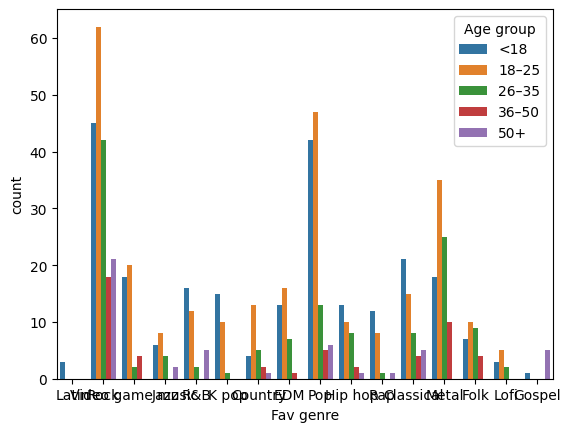

In [35]:
datos['Age group'] = pd.cut(datos['Age'], bins=[10, 18, 25, 35, 50, 100],
                         labels=['<18', '18–25', '26–35', '36–50', '50+'])
sns.countplot(data=datos, x='Fav genre', hue='Age group')